In [12]:
from utils import load_from_json
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def plot_multiple_confusion_matrices(cms, labels=None):
    """
    Plots multiple confusion matrices separately.
    
    Parameters:
    - cms (list): List of confusion matrices, one per fold.
    - labels (list): List of class labels for the x and y ticks.
    """
    num_folds = len(cms)
    fig, axes = plt.subplots(1, num_folds, figsize=(6 * num_folds, 6))
    
    for i, cm in enumerate(cms):
        ax = axes[i] if num_folds > 1 else axes
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_title(f'Confusion Matrix Fold {i+1}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()


def plot_aggregated_confusion_matrix(cms, labels=None):
    """
    Aggregates multiple confusion matrices and plots the cumulative matrix.
    
    Parameters:
    - cms (list): List of confusion matrices.
    - labels (list): List of class labels for the x and y ticks.
    """
    # Sum the confusion matrices
    cumulative_cm = np.sum(cms, axis=0)
    
    # Plot the cumulative confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cumulative_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title('Cumulative Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()


def plot_average_confusion_matrix(cms, labels=None):
    """
    Averages multiple confusion matrices and plots the result.
    
    Parameters:
    - cms (list): List of confusion matrices.
    - labels (list): List of class labels for the x and y ticks.
    """
    # Calculate the average confusion matrix
    average_cm = np.mean(cms, axis=0)
    
    # Plot the average confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(average_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title('Average Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(cm, labels=None, title='Confusion Matrix'):
    """
    Plots a confusion matrix with heatmap visualization.
    
    Parameters:
    - cm (array-like): Confusion matrix, typically a 2D array or matrix.
    - labels (list): List of class labels to use for the x and y ticks. 
    - title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.tight_layout()
    plt.show()


def kfold_results(classification_metrics_list):
    print("#"*10 + " K-fold results " + "#"*10)
    metric_names = list(classification_metrics_list[0].keys())
    confusion_matrices = list()

    for metric_name in metric_names:
        if metric_name not in ["confusion_matrix", "classification_report"]:
            kfold_metric = [x[metric_name] for x in classification_metrics_list]
            print(f"{metric_name}: mean: {np.mean(np.array(kfold_metric))}, std: {np.std(np.array(kfold_metric))}")
        if metric_name == "confusion_matrix":
            confusion_matrices = [np.array(x["confusion_matrix"]) for x in classification_metrics_list]

    return confusion_matrices


def print_plot_results(dir):
    kfold_mlp = load_from_json(dir)
    confusion_matrices = kfold_results(kfold_mlp)
    labels = [str(i) for i in range(len(confusion_matrices[0]))]
    plot_multiple_confusion_matrices(confusion_matrices, labels=labels)
    plot_aggregated_confusion_matrix(confusion_matrices, labels=labels)
    plot_average_confusion_matrix(confusion_matrices, labels=labels)

# mlp network on mlp data

########## K-fold results ##########
accuracy: mean: 0.9761904761904762, std: 0.003563483225498985
precision: mean: 0.9727794181721148, std: 0.00993127220166651
recall: mean: 0.9761904761904762, std: 0.003563483225498985
f1: mean: 0.9736261008506393, std: 0.00614981808589638
below_diagonal_percentage: mean: 0.017619047619047618, std: 0.0033671751485073696


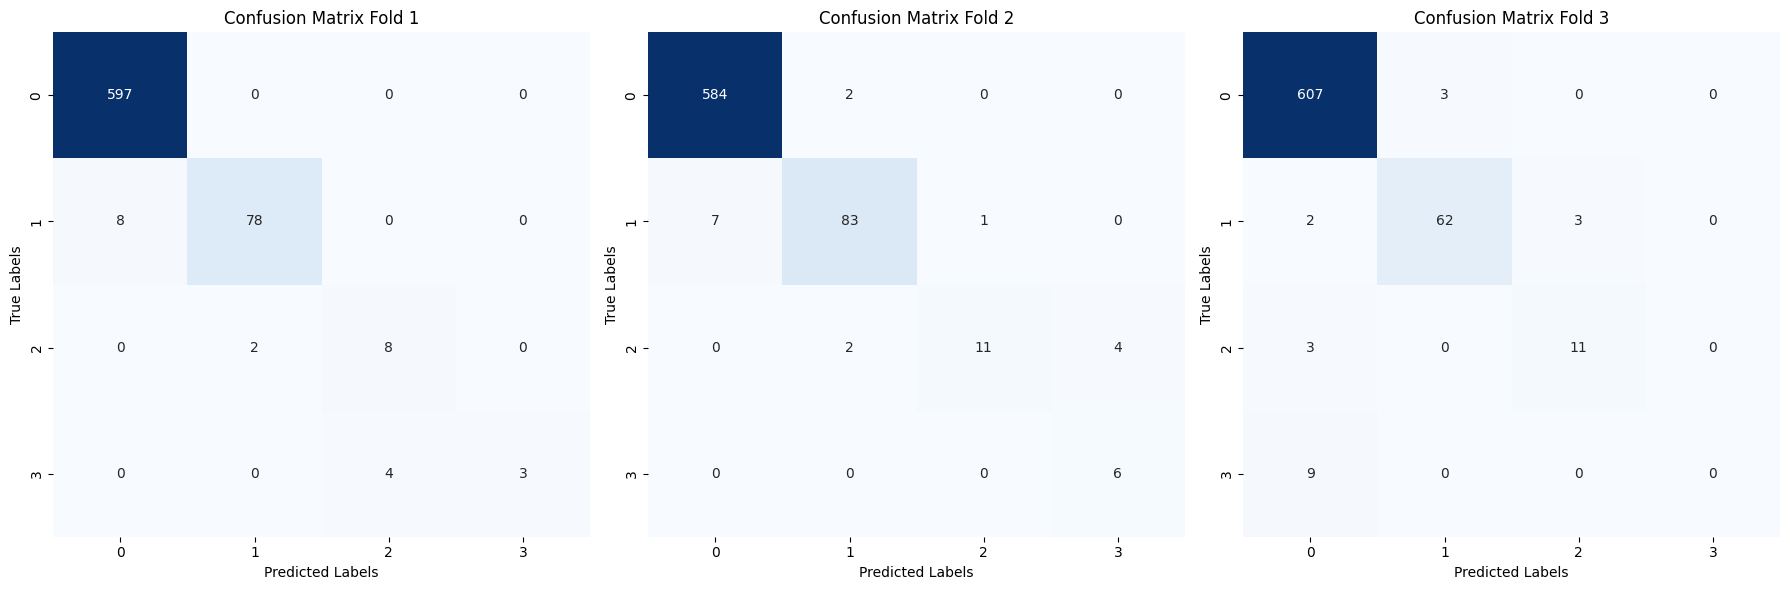

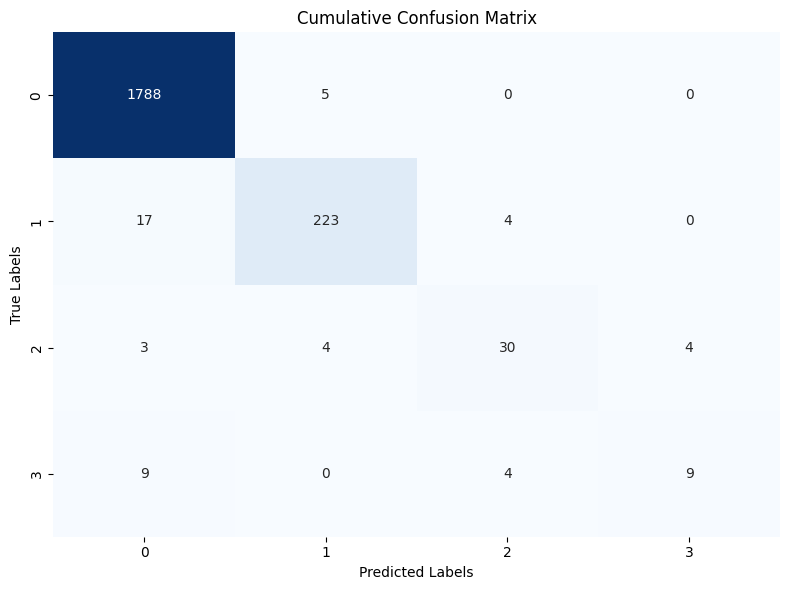

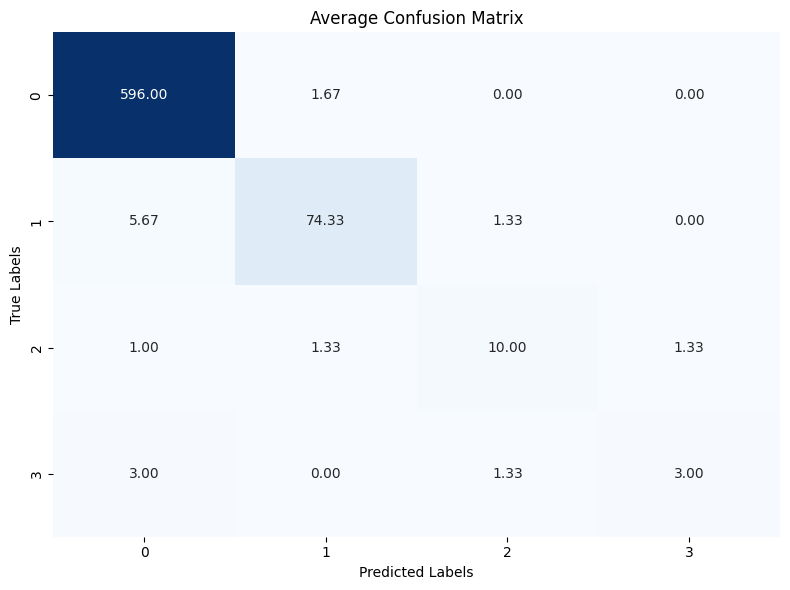

In [13]:
print_plot_results("./k_fold_results/mlp_model/mlp.json")

# mlp network on cnn data

########## K-fold results ##########
accuracy: mean: 0.7964912280701754, std: 0.016793148876383012
precision: mean: 0.8209659790540758, std: 0.0076909118675749415
recall: mean: 0.7964912280701754, std: 0.016793148876383012
f1: mean: 0.8011481204368894, std: 0.015433226092170222
below_diagonal_percentage: mean: 0.07192982456140351, std: 0.014356918687134129


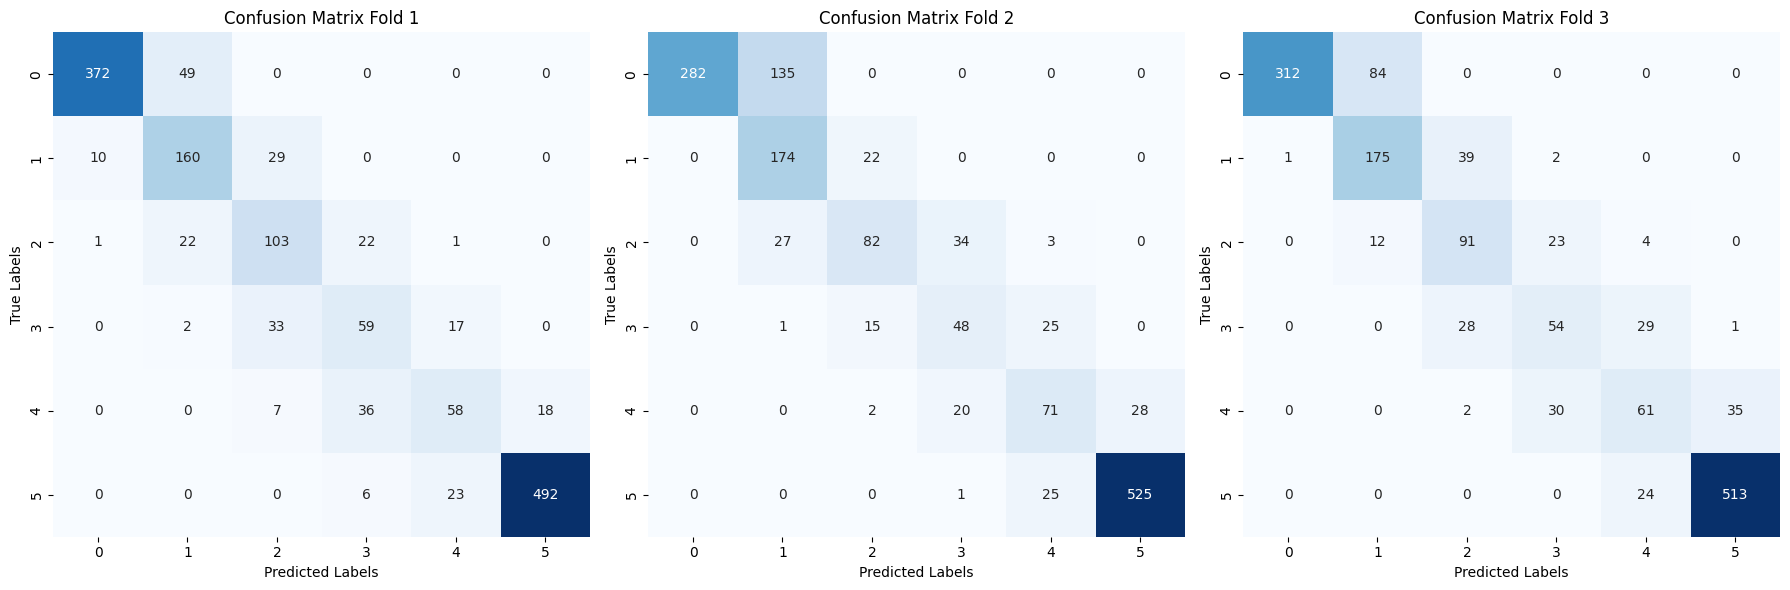

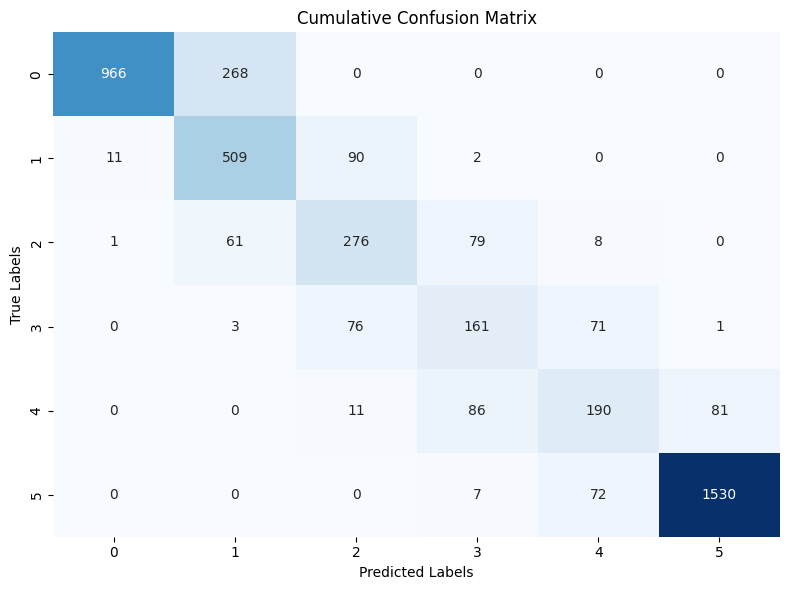

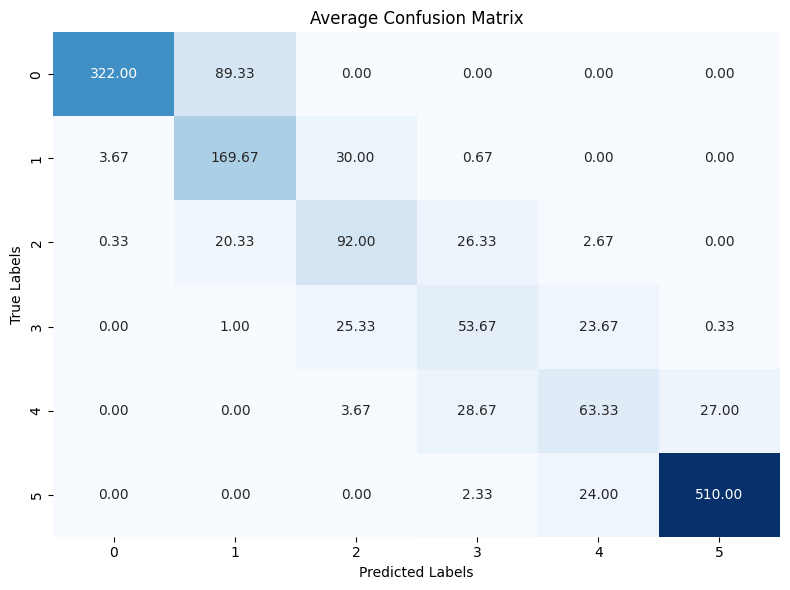

In [14]:
print_plot_results("./k_fold_results/mlp_model/cnn.json")

# mlp network on transformer data

########## K-fold results ##########
accuracy: mean: 0.8483033932135728, std: 0.01659234277271302
precision: mean: 0.840808718357985, std: 0.021891003130973703
recall: mean: 0.8483033932135728, std: 0.01659234277271302
f1: mean: 0.8408431593304603, std: 0.020483234327473555
below_diagonal_percentage: mean: 0.10721414314228685, std: 0.03833463858170247


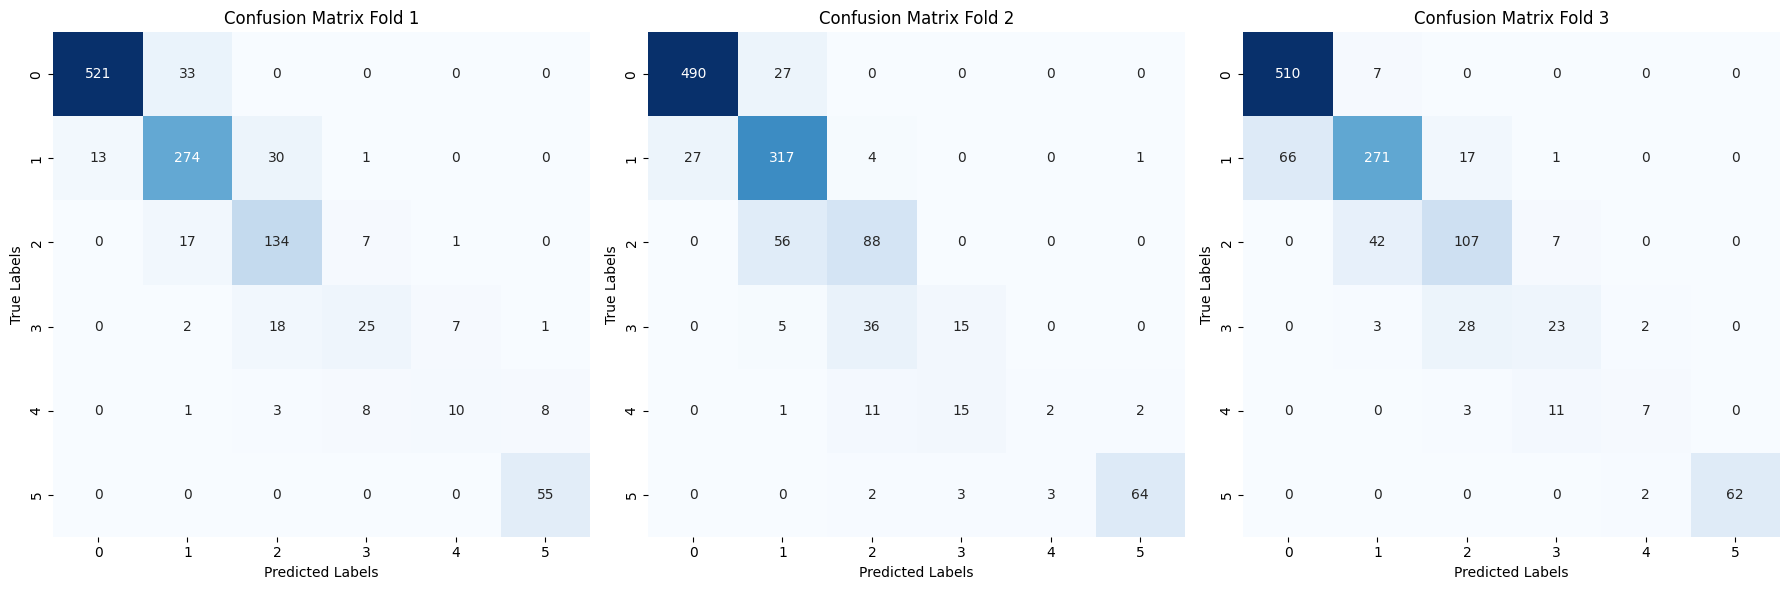

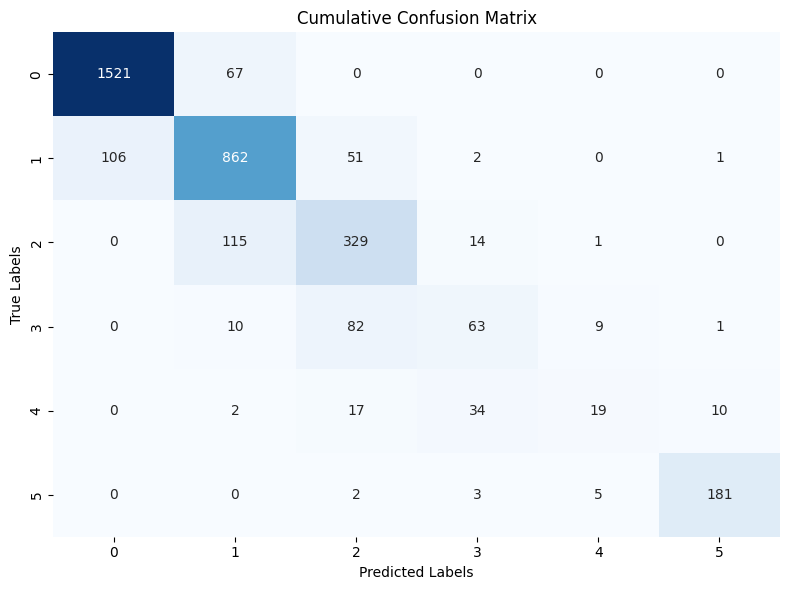

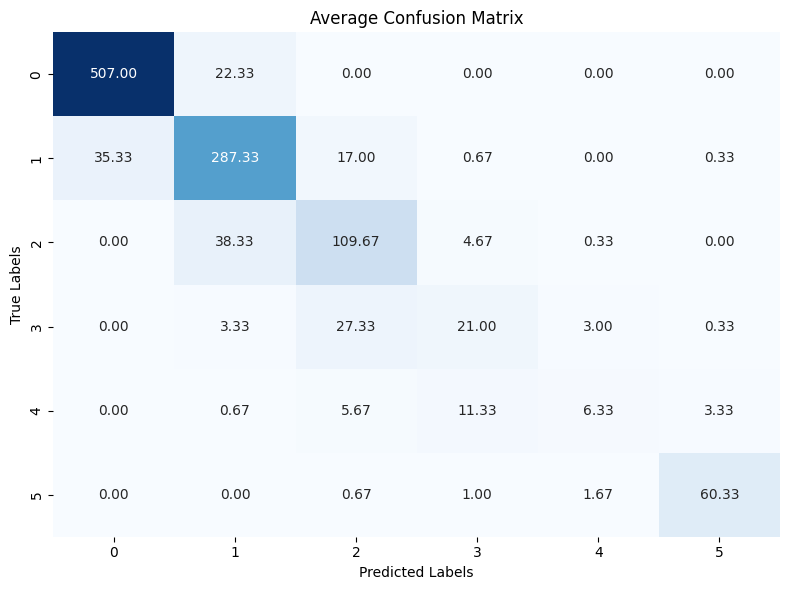

In [15]:
print_plot_results("./k_fold_results/mlp_model/transformer.json")


# transformer model on mlp data

########## K-fold results ##########
accuracy: mean: 0.9838095238095238, std: 0.004096345365258399
precision: mean: 0.9850067486419918, std: 0.00433038057131564
recall: mean: 0.9838095238095238, std: 0.004096345365258399
f1: mean: 0.9836946325177247, std: 0.004269786244836704
below_diagonal_percentage: mean: 0.007619047619047619, std: 0.003563483225498992


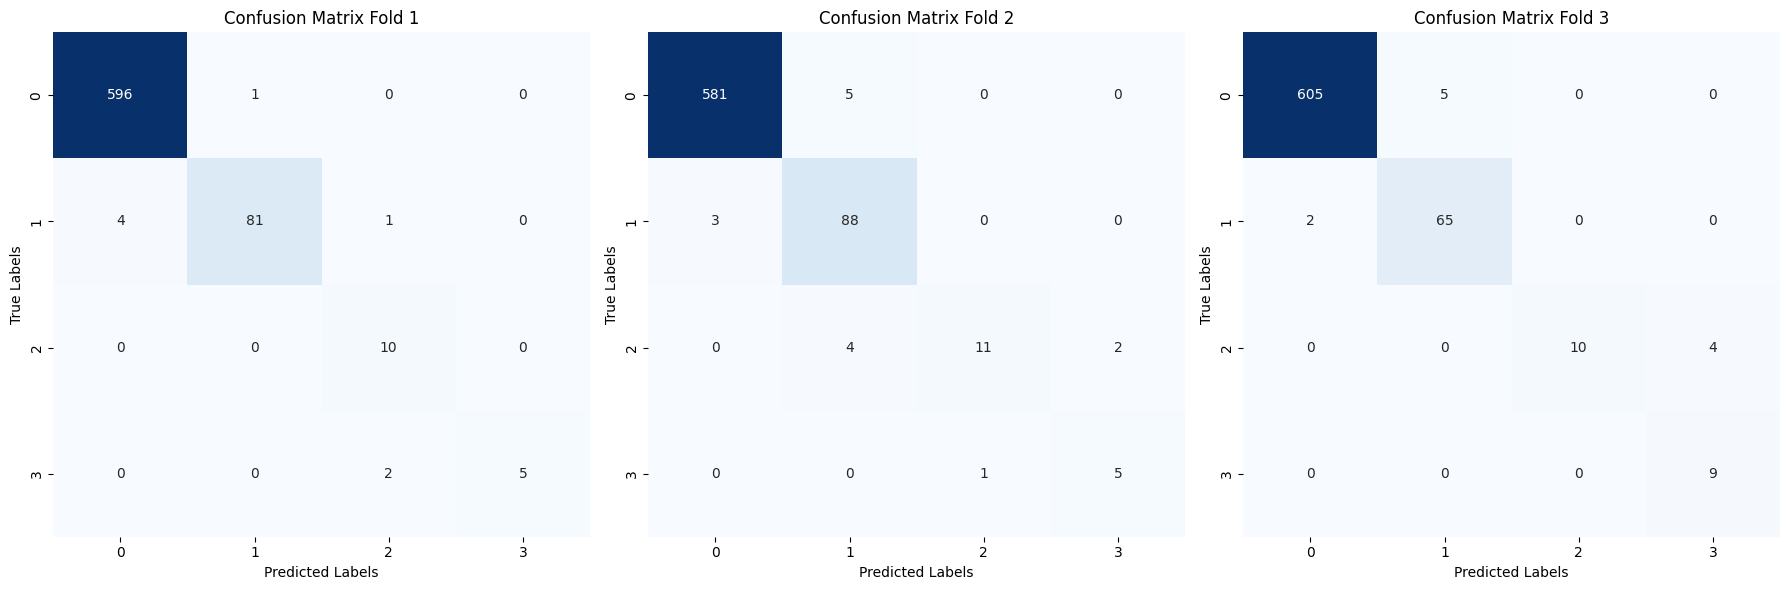

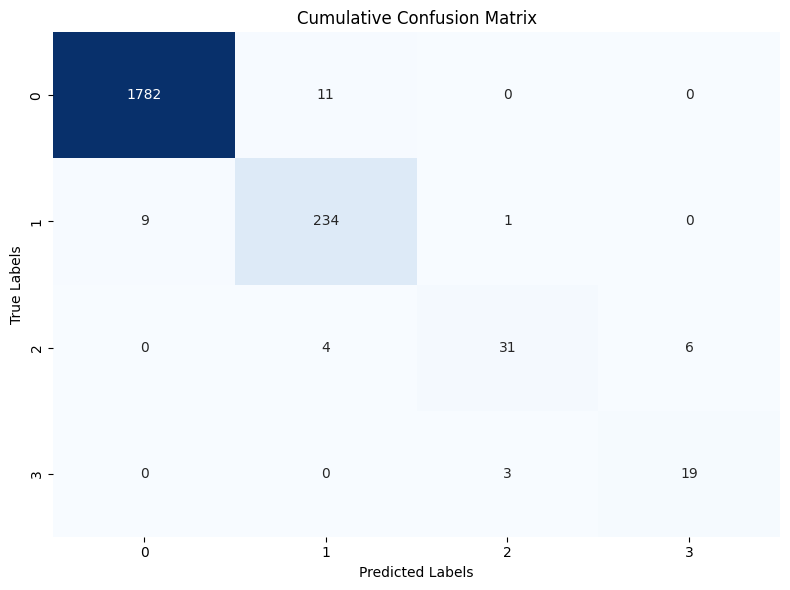

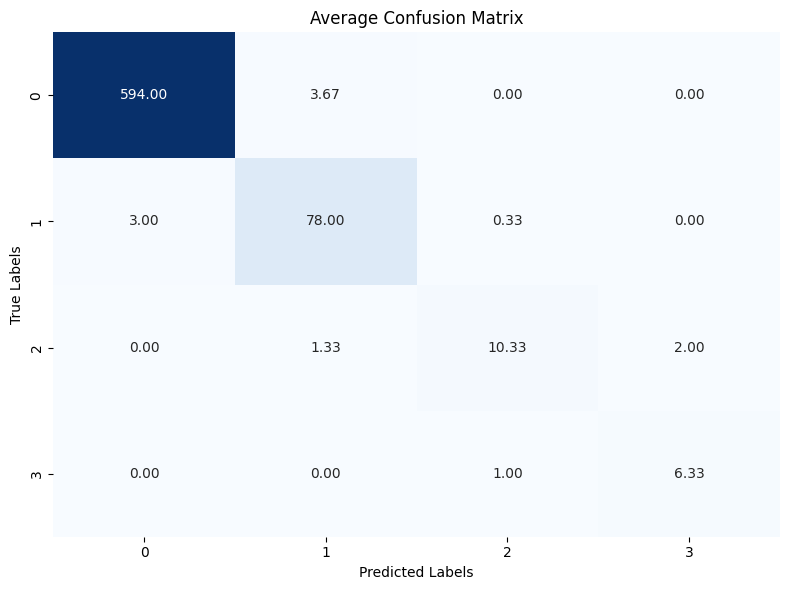

In [16]:
print_plot_results("./k_fold_results/transformer_model/mlp.json")

# transformer model on cnn data

########## K-fold results ##########
accuracy: mean: 0.8028508771929825, std: 0.009909757480434203
precision: mean: 0.8235659038156249, std: 0.0013258566590267343
recall: mean: 0.8028508771929825, std: 0.009909757480434203
f1: mean: 0.8076718045637868, std: 0.008635641847719748
below_diagonal_percentage: mean: 0.07828947368421053, std: 0.02199770197013222


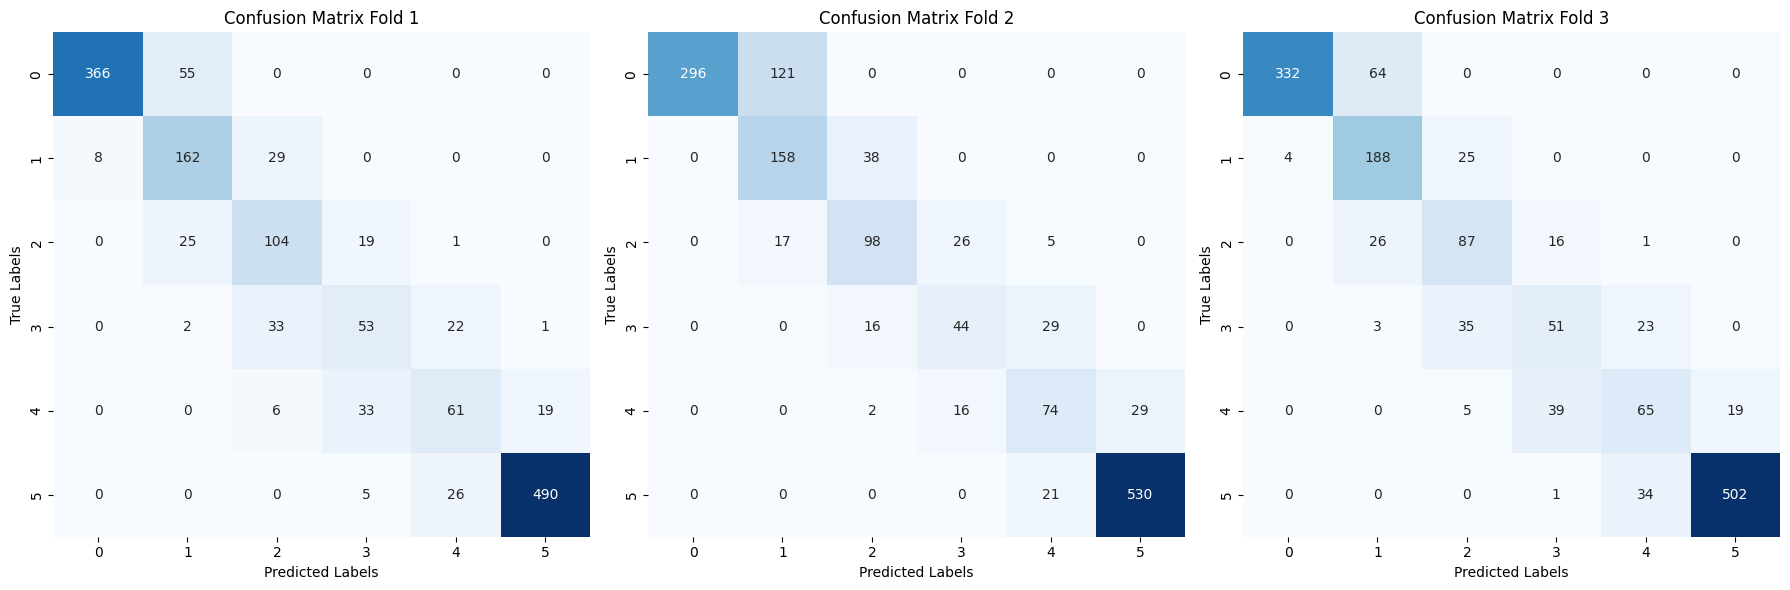

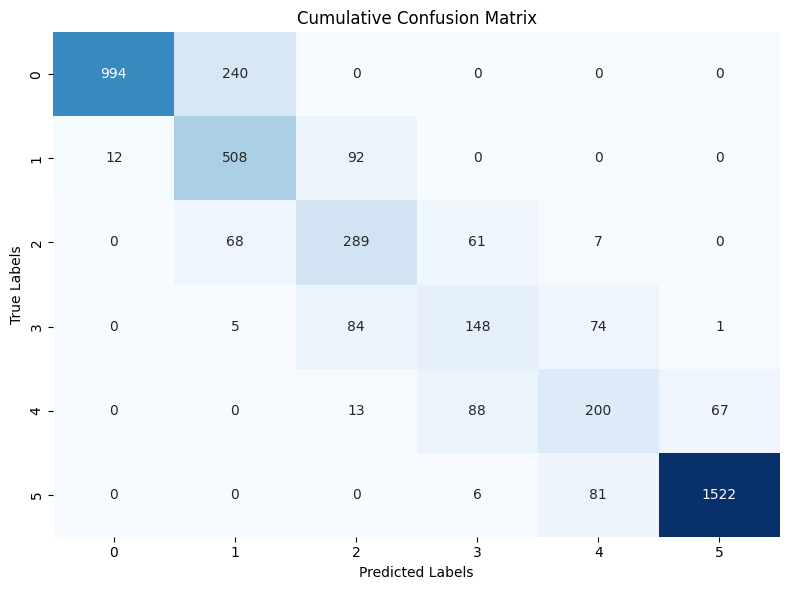

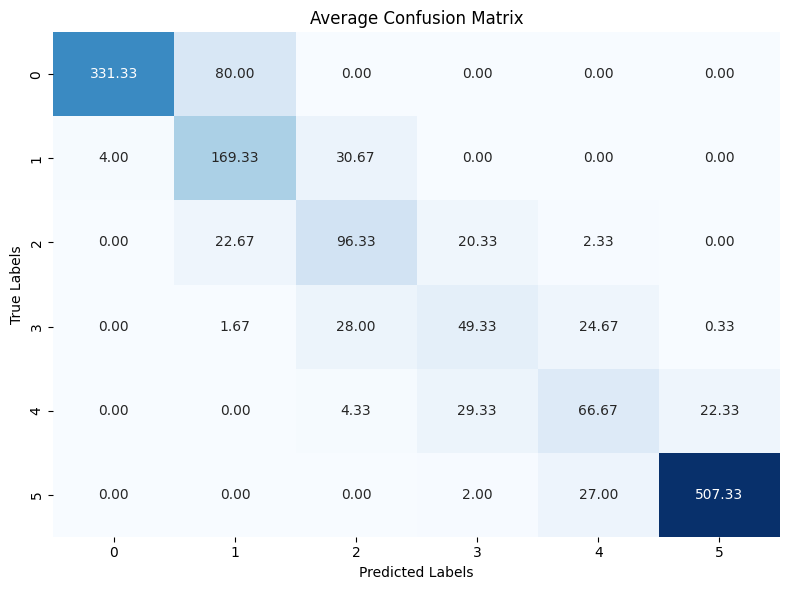

In [17]:
print_plot_results("./k_fold_results/transformer_model/cnn.json")


# transformer model on transformer data

########## K-fold results ##########
accuracy: mean: 0.8582834331337326, std: 0.013567581697599432
precision: mean: 0.8637583854761456, std: 0.010980451968828698
recall: mean: 0.8582834331337326, std: 0.013567581697599432
f1: mean: 0.8572666898153093, std: 0.012701343430409016
below_diagonal_percentage: mean: 0.06358711149130311, std: 0.024198630749104222


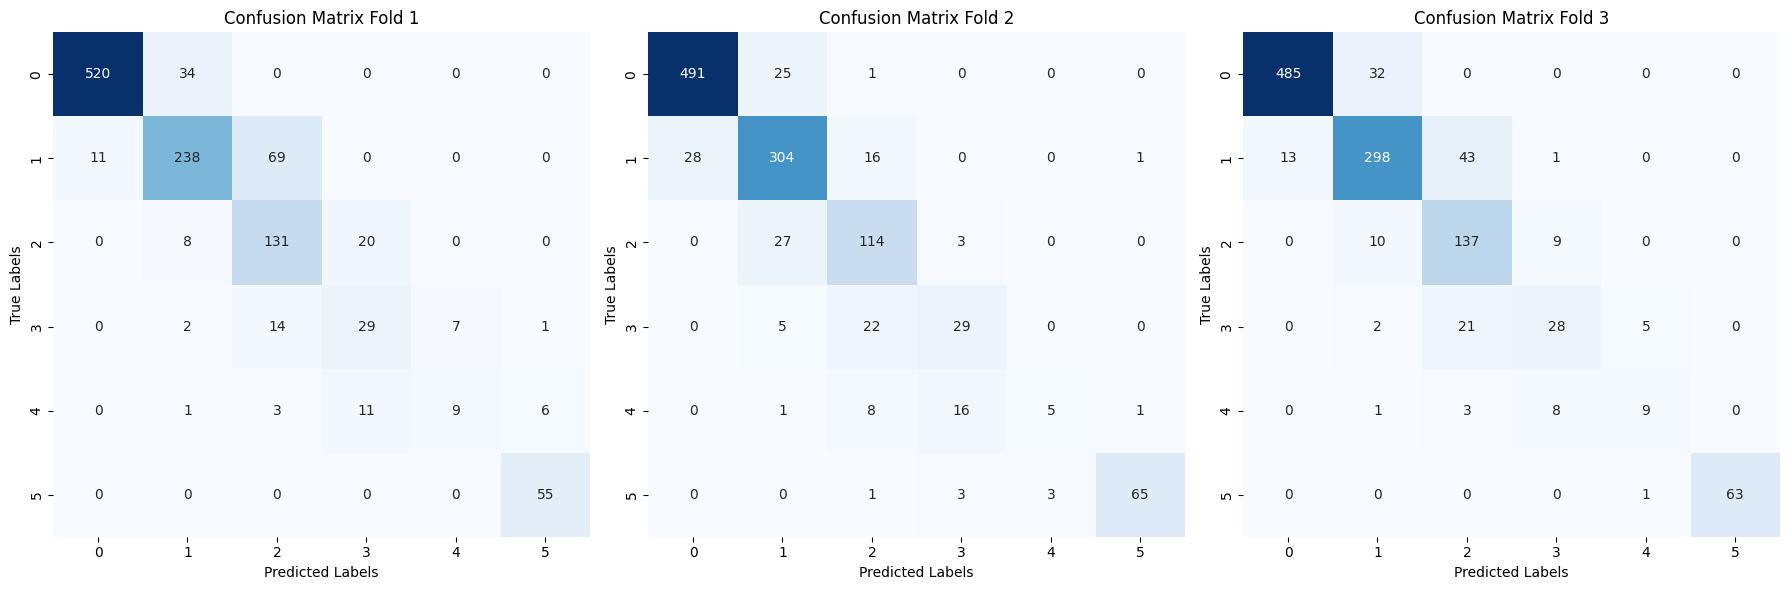

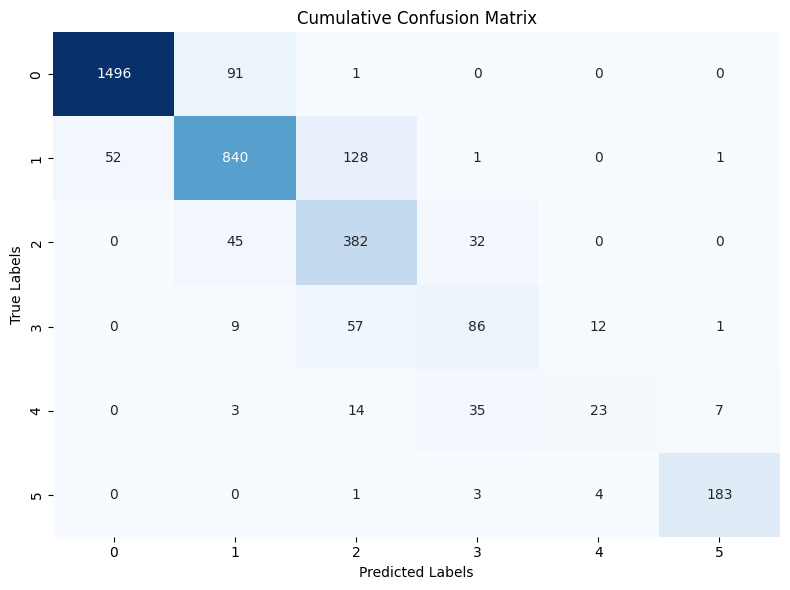

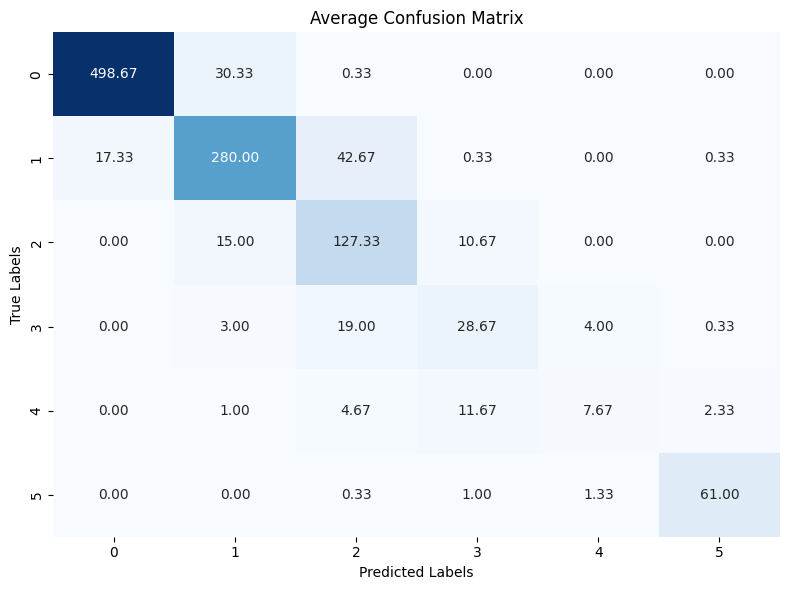

In [18]:
print_plot_results("./k_fold_results/transformer_model/transformer.json")
